# API Installation, Dependency Imports, and CSV Uploads

In [1]:
# Install API
#pip install nba_api

In [2]:
# Dependencies
import requests as rq
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import datetime as dt
import scipy.stats as st
from scipy.stats import pearsonr
from scipy.stats import linregress

from nba_api.stats.static import players
from nba_api.stats.static import teams

from nba_api.stats.endpoints import shotchartdetail
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.endpoints import drafthistory
from nba_api.stats.endpoints import playergamelog
from nba_api.stats.endpoints import playercompare

from nba_api.stats.endpoints._base import Endpoint
from nba_api.stats.library.http import NBAStatsHTTP
from nba_api.stats.library.parameters import Season, SeasonTypeAllStar, LeagueIDNullable, SeasonAll
from nba_api.stats.library.parameters import GameSegmentNullable, LastNGamesNullable, LeagueIDNullable, LocationNullable, MonthNullable, OutcomeNullable, PerModeSimpleNullable, PeriodNullable, SeasonNullable, SeasonSegmentNullable, SeasonTypeNullable, ShotClockRangeNullable, ConferenceNullable, DivisionNullable
from nba_api.stats.endpoints import teamgamelogs

In [3]:
#Import all players to play in the NBA
players_csv = "Resources/all_seasons.csv"
players_df = pd.read_csv(players_csv)
players_df["player_height"] = players_df["player_height"]/2.54
players1 = players_df.drop_duplicates("player_name")
all_players = players1.rename(columns = {"player_name":"Player"})

In [4]:
# Import CSV w/ data from SportsReference.com & BasketballReference.com
undrafted_since_11_df = pd.read_csv('Resources/undrafted_stats.csv',encoding = 'utf-8')

# Part One: Team Analysis

In [5]:
class TeamGameLogs(Endpoint):
    endpoint = 'teamgamelogs'
    expected_data = {'TeamGameLogs': ['SEASON_YEAR', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK']}


In [6]:
teamrecord_df = teamgamelogs.TeamGameLogs()

In [7]:
teamrecord_df.team_game_logs.get_data_frame()

,SEASON_YEAR,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK
0,2016-17,1610612745,HOU,Houston Rockets,0021601224,2017-04-12T00:00:00,HOU vs. MIN,W,48.0,45,...,625,10,280,235,324,440,159,2104,164,898
1,2016-17,1610612754,IND,Indiana Pacers,0021601226,2017-04-12T00:00:00,IND vs. ATL,W,48.0,39,...,1524,1407,280,1904,324,825,159,2104,1339,217
2,2016-17,1610612758,SAC,Sacramento Kings,0021601228,2017-04-12T00:00:00,SAC @ LAC,L,48.0,40,...,2040,419,451,2405,2281,1631,705,2104,1949,2270
3,2016-17,1610612757,POR,Portland Trail Blazers,0021601230,2017-04-12T00:00:00,POR vs. NOP,L,48.0,41,...,151,1222,2444,2142,2022,440,705,1757,1624,1348
4,2016-17,1610612739,CLE,Cleveland Cavaliers,0021601218,2017-04-12T00:00:00,CLE vs. TOR,L,48.0,28,...,1378,1584,1413,1904,324,181,159,1059,2378,2101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,2016-17,1610612744,GSW,Golden State Warriors,0021600003,2016-10-25T00:00:00,GSW vs. SAS,L,48.0,40,...,2199,855,1655,235,537,440,930,1292,1624,2405
2456,2016-17,1610612752,NYK,New York Knicks,0021600001,2016-10-25T00:00:00,NYK @ CLE,L,48.0,32,...,1378,2076,2015,1594,537,1249,1622,647,2268,2405
2457,2016-17,1610612762,UTA,Utah Jazz,0021600002,2016-10-25T00:00:00,UTA @ POR,L,48.0,40,...,2403,1762,1184,605,831,440,930,1532,1339,1813
2458,2016-17,1610612739,CLE,Cleveland Cavaliers,0021600001,2016-10-25T00:00:00,CLE vs. NYK,W,48.0,45,...,263,121,1413,149,831,1631,1622,647,402,50


In [8]:
teamrecord_df = teamrecord_df.team_game_logs.get_data_frame()

In [9]:
teamrecord_df = teamrecord_df[['SEASON_YEAR','TEAM_NAME', 'GAME_ID',
       'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV',
       'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS']]

In [10]:
# New Orleans Pelicans
NOP_df = teamrecord_df[teamrecord_df["TEAM_NAME"]=="New Orleans Pelicans"]

NOP_FGA = NOP_df["FGA"].sum()/82
NOP_FGM = NOP_df["FGM"].sum()/82
NOP_FG3A = NOP_df["FG3A"].sum()/82
NOP_FG3M = NOP_df["FG3M"].sum()/82
NOP_TA = (NOP_FGA + NOP_FG3A)
NOP_TM = (NOP_FGM + NOP_FG3M)
NOP_REB= NOP_df["REB"].sum()/82
NOP_AST= NOP_df["AST"].sum()/82

NOP_W =(NOP_df.WL == 'W').sum()

# LA CLippers

LAC_df = teamrecord_df[teamrecord_df["TEAM_NAME"]=="LA Clippers"]

LAC_FGA = LAC_df["FGA"].sum()/82
LAC_FGM = LAC_df["FGM"].sum()/82
LAC_FG3A = LAC_df["FG3A"].sum()/82
LAC_FG3M = LAC_df["FG3M"].sum()/82
LAC_W =(LAC_df.WL == 'W').sum()
LAC_L =(LAC_df.WL == 'L').sum()
LAC_PercentWins = str(round((LAC_W/(LAC_W + LAC_L)),2))

# Oklahoma City Thunder
OKC_df = teamrecord_df[teamrecord_df["TEAM_NAME"]=="Oklahoma City Thunder"]


OKC_FGA = OKC_df["FGA"].sum()/82
OKC_FGM = OKC_df["FGM"].sum()/82
OKC_FG3A = OKC_df["FG3A"].sum()/82
OKC_FG3M = OKC_df["FG3M"].sum()/82
OKC_W =(OKC_df.WL == 'W').sum()
OKC_L =(OKC_df.WL == 'L').sum()
OKC_PercentWins = str(round((OKC_W/(OKC_W + OKC_L)),2))

# Cleveland Cavaliers
CLE_df = teamrecord_df[teamrecord_df["TEAM_NAME"]=="Cleveland Cavaliers"]

CLE_FGA = CLE_df["FGA"].sum()/82
CLE_FGM = CLE_df["FGM"].sum()/82
CLE_FG3A = CLE_df["FG3A"].sum()/82
CLE_FG3M = CLE_df["FG3M"].sum()/82
CLE_W =(CLE_df.WL == 'W').sum()
CLE_L =(CLE_df.WL == 'L').sum()
CLE_PercentWins = str(round((CLE_W/(CLE_W + CLE_L)),2))

# New York Knicks
NYK_df = teamrecord_df[teamrecord_df["TEAM_NAME"]=="New York Knicks"]

NYK_FGA = NYK_df["FGA"].sum()/82
NYK_FGM = NYK_df["FGM"].sum()/82
NYK_FG3A = NYK_df["FG3A"].sum()/82
NYK_FG3M = NYK_df["FG3M"].sum()/82
NYK_TA = NYK_FGA + NYK_FG3A
NYK_W =(NYK_df.WL == 'W').sum()
NYK_L =(NYK_df.WL == 'L').sum()
NYK_PercentWins = str(round((NYK_W/(NYK_W + NYK_L)),2))

# Chicago Bulls
CHI_df = teamrecord_df[teamrecord_df["TEAM_NAME"]=="Chicago Bulls"]

CHI_FGA = CHI_df["FGA"].sum()/82
CHI_FGM = CHI_df["FGM"].sum()/82
CHI_FG3A = CHI_df["FG3A"].sum()/82
CHI_FG3M = CHI_df["FG3M"].sum()/82
CHI_TA = (CHI_FGA + CHI_FG3A)
CHI_TM = (CHI_FGM + CHI_FG3M)

CHI_W =(CHI_df.WL == 'W').sum()


# San Antonio Spurs
SAS_df = teamrecord_df[teamrecord_df["TEAM_NAME"]=="San Antonio Spurs"]

SAS_FGA = SAS_df["FGA"].sum()/82
SAS_FGM = SAS_df["FGM"].sum()/82
SAS_FG3A = SAS_df["FG3A"].sum()/82
SAS_FG3M = SAS_df["FG3M"].sum()/82
SAS_TA = (SAS_FGA + SAS_FG3A)
SAS_TM = (SAS_FGM + SAS_FG3M)

SAS_W =(SAS_df.WL == 'W').sum()

# Denver Nuggets
DEN_df = teamrecord_df[teamrecord_df["TEAM_NAME"]=="Denver Nuggets"]

DEN_FGA = DEN_df["FGA"].sum()/82
DEN_FGM = DEN_df["FGM"].sum()/82
DEN_FG3A = DEN_df["FG3A"].sum()/82
DEN_FG3M = DEN_df["FG3M"].sum()/82
DEN_TA = (DEN_FGA + DEN_FG3A)
DEN_TM = (DEN_FGM + DEN_FG3M)

DEN_W =(DEN_df.WL == 'W').sum()

# Portland Trailblazers
POR_df = teamrecord_df[teamrecord_df["TEAM_NAME"]=="Portland Trail Blazers"]

POR_FGA = POR_df["FGA"].sum()/82
POR_FGM = POR_df["FGM"].sum()/82
POR_FG3A = POR_df["FG3A"].sum()/82
POR_FG3M = POR_df["FG3M"].sum()/82
POR_TA = (POR_FGA + POR_FG3A)
POR_TM = (POR_FGM + POR_FG3M)

POR_W =(POR_df.WL == 'W').sum()

# Minnesota Timberwolves
MIN_df = teamrecord_df[teamrecord_df["TEAM_NAME"]=="Minnesota Timberwolves"]

MIN_FGA = MIN_df["FGA"].sum()/82
MIN_FGM = MIN_df["FGM"].sum()/82
MIN_FG3A = MIN_df["FG3A"].sum()/82
MIN_FG3M = MIN_df["FG3M"].sum()/82
MIN_TA = (MIN_FGA + MIN_FG3A)
MIN_TM = (MIN_FGM + MIN_FG3M)

MIN_W =(MIN_df.WL == 'W').sum()

# Boston Celtics
BOS_df = teamrecord_df[teamrecord_df["TEAM_NAME"]=="Boston Celtics"]

BOS_FGA = BOS_df["FGA"].sum()/82
BOS_FGM = BOS_df["FGM"].sum()/82
BOS_FG3A = BOS_df["FG3A"].sum()/82
BOS_FG3M = BOS_df["FG3M"].sum()/82
BOS_TA = (BOS_FGA + BOS_FG3A)
BOS_TM = (BOS_FGM + BOS_FG3M)

BOS_W =(BOS_df.WL == 'W').sum()

# Orlando Magic
ORL_df = teamrecord_df[teamrecord_df["TEAM_NAME"]=="Orlando Magic"]

ORL_FGA = ORL_df["FGA"].sum()/82
ORL_FGM = ORL_df["FGM"].sum()/82
ORL_FG3A = ORL_df["FG3A"].sum()/82
ORL_FG3M = ORL_df["FG3M"].sum()/82
ORL_TA = (ORL_FGA + ORL_FG3A)
ORL_TM = (ORL_FGM + ORL_FG3M)

ORL_W =(ORL_df.WL == 'W').sum()

# Toronto Raptors
TOR_df = teamrecord_df[teamrecord_df["TEAM_NAME"]=="Toronto Raptors"]

TOR_FGA = TOR_df["FGA"].sum()/82
TOR_FGM = TOR_df["FGM"].sum()/82
TOR_FG3A = TOR_df["FG3A"].sum()/82
TOR_FG3M = TOR_df["FG3M"].sum()/82
TOR_TA = (TOR_FGA + TOR_FG3A)
TOR_TM = (TOR_FGM + TOR_FG3M)

TOR_W =(TOR_df.WL == 'W').sum()

# Los Angeles Lakers
LAL_df = teamrecord_df[teamrecord_df["TEAM_NAME"]=="Los Angeles Lakers"]

LAL_FGA = LAL_df["FGA"].sum()/82
LAL_FGM = LAL_df["FGM"].sum()/82
LAL_FG3A = LAL_df["FG3A"].sum()/82
LAL_FG3M = LAL_df["FG3M"].sum()/82
LAL_TA = (LAL_FGA + LAL_FG3A)
LAL_TM = (LAL_FGM + LAL_FG3M)

LAL_W =(LAL_df.WL == 'W').sum()

# Washington Wizards
WAS_df = teamrecord_df[teamrecord_df["TEAM_NAME"]=="Washington Wizards"]

WAS_FGA = WAS_df["FGA"].sum()/82
WAS_FGM = WAS_df["FGM"].sum()/82
WAS_FG3A = WAS_df["FG3A"].sum()/82
WAS_FG3M = WAS_df["FG3M"].sum()/82
WAS_TA = (WAS_FGA + WAS_FG3A)
WAS_TM = (WAS_FGM + WAS_FG3M)

WAS_W =(WAS_df.WL == 'W').sum()

# Indiana Pacers
IND_df = teamrecord_df[teamrecord_df["TEAM_NAME"]=="Indiana Pacers"]

IND_FGA = IND_df["FGA"].sum()/82
IND_FGM = IND_df["FGM"].sum()/82
IND_FG3A = IND_df["FG3A"].sum()/82
IND_FG3M = IND_df["FG3M"].sum()/82
IND_TA = (IND_FGA + IND_FG3A)
IND_TM = (IND_FGM + IND_FG3M)

IND_W =(IND_df.WL == 'W').sum()

# Sacramento Kings
SAC_df = teamrecord_df[teamrecord_df["TEAM_NAME"]=="Sacramento Kings"]

SAC_FGA = SAC_df["FGA"].sum()/82
SAC_FGM = SAC_df["FGM"].sum()/82
SAC_FG3A = SAC_df["FG3A"].sum()/82
SAC_FG3M = SAC_df["FG3M"].sum()/82
SAC_TA = (SAC_FGA + SAC_FG3A)
SAC_TM = (SAC_FGM + SAC_FG3M)

SAC_W =(SAC_df.WL == 'W').sum()

# Detroit Pistons
DET_df = teamrecord_df[teamrecord_df["TEAM_NAME"]=="Detroit Pistons"]

DET_FGA = DET_df["FGA"].sum()/82
DET_FGM = DET_df["FGM"].sum()/82
DET_FG3A = DET_df["FG3A"].sum()/82
DET_FG3M = DET_df["FG3M"].sum()/82
DET_TA = (DET_FGA + DET_FG3A)
DET_TM = (DET_FGM + DET_FG3M)

DET_W =(DET_df.WL == 'W').sum()

# Dallas Mavericks
DAL_df = teamrecord_df[teamrecord_df["TEAM_NAME"]=="Dallas Mavericks"]

DAL_FGA = DAL_df["FGA"].sum()/82
DAL_FGM = DAL_df["FGM"].sum()/82
DAL_FG3A = DAL_df["FG3A"].sum()/82
DAL_FG3M = DAL_df["FG3M"].sum()/82
DAL_TA = (DAL_FGA + DAL_FG3A)
DAL_TM = (DAL_FGM + DAL_FG3M)

DAL_W =(DAL_df.WL == 'W').sum()

# Miami Heat
MIA_df = teamrecord_df[teamrecord_df["TEAM_NAME"]=="Miami Heat"]

MIA_FGA = MIA_df["FGA"].sum()/82
MIA_FGM = MIA_df["FGM"].sum()/82
MIA_FG3A = MIA_df["FG3A"].sum()/82
MIA_FG3M = MIA_df["FG3M"].sum()/82
MIA_TA = (MIA_FGA + MIA_FG3A)
MIA_TM = (MIA_FGM + MIA_FG3M)

MIA_W =(MIA_df.WL == 'W').sum()

# Philadelphia 76ers
PHI_df = teamrecord_df[teamrecord_df["TEAM_NAME"]=="Philadelphia 76ers"]

PHI_FGA = PHI_df["FGA"].sum()/82
PHI_FGM = PHI_df["FGM"].sum()/82
PHI_FG3A = PHI_df["FG3A"].sum()/82
PHI_FG3M = PHI_df["FG3M"].sum()/82
PHI_TA = (PHI_FGA + PHI_FG3A)
PHI_TM = (PHI_FGM + PHI_FG3M)

PHI_W =(PHI_df.WL == 'W').sum()

# Chicago Bulls
CHI_df = teamrecord_df[teamrecord_df["TEAM_NAME"]=="Chicago Bulls"]

CHI_FGA = CHI_df["FGA"].sum()/82
CHI_FGM = CHI_df["FGM"].sum()/82
CHI_FG3A = CHI_df["FG3A"].sum()/82
CHI_FG3M = CHI_df["FG3M"].sum()/82
CHI_TA = (CHI_FGA + CHI_FG3A)
CHI_TM = (CHI_FGM + CHI_FG3M)

CHI_W =(CHI_df.WL == 'W').sum()

# Brooklyn Nets
BKN_df = teamrecord_df[teamrecord_df["TEAM_NAME"]=="Brooklyn Nets"]

BKN_FGA = BKN_df["FGA"].sum()/82
BKN_FGM = BKN_df["FGM"].sum()/82
BKN_FG3A = BKN_df["FG3A"].sum()/82
BKN_FG3M = BKN_df["FG3M"].sum()/82
BKN_TA = (BKN_FGA + BKN_FG3A)
BKN_TM = (BKN_FGM + BKN_FG3M)

BKN_W =(BKN_df.WL == 'W').sum()

# Atlanta Hawks
ATL_df = teamrecord_df[teamrecord_df["TEAM_NAME"]=="Atlanta Hawks"]

ATL_FGA = ATL_df["FGA"].sum()/82
ATL_FGM = ATL_df["FGM"].sum()/82
ATL_FG3A = ATL_df["FG3A"].sum()/82
ATL_FG3M = ATL_df["FG3M"].sum()/82
ATL_TA = (ATL_FGA + ATL_FG3A)
ATL_TM = (ATL_FGM + ATL_FG3M)

ATL_W =(ATL_df.WL == 'W').sum()

# Houston Rockets
HOU_df = teamrecord_df[teamrecord_df["TEAM_NAME"]=="Houston Rockets"]

HOU_FGA = HOU_df["FGA"].sum()/82
HOU_FGM = HOU_df["FGM"].sum()/82
HOU_FG3A = HOU_df["FG3A"].sum()/82
HOU_FG3M = HOU_df["FG3M"].sum()/82
HOU_TA = (HOU_FGA + HOU_FG3A)
HOU_TM = (HOU_FGM + HOU_FG3M)

HOU_W =(HOU_df.WL == 'W').sum()

# Utah Jazz
UTA_df = teamrecord_df[teamrecord_df["TEAM_NAME"]=="Utah Jazz"]

UTA_FGA = UTA_df["FGA"].sum()/82
UTA_FGM = UTA_df["FGM"].sum()/82
UTA_FG3A = UTA_df["FG3A"].sum()/82
UTA_FG3M = UTA_df["FG3M"].sum()/82
UTA_TA = (UTA_FGA + UTA_FG3A)
UTA_TM = (UTA_FGM + UTA_FG3M)

UTA_W =(UTA_df.WL == 'W').sum()

# Golden State Warriors
GSW_df = teamrecord_df[teamrecord_df["TEAM_NAME"]=="Golden State Warriors"]

GSW_FGA = GSW_df["FGA"].sum()/82
GSW_FGM = GSW_df["FGM"].sum()/82
GSW_FG3A = GSW_df["FG3A"].sum()/82
GSW_FG3M = GSW_df["FG3M"].sum()/82
GSW_TA = (GSW_FGA + GSW_FG3A)
GSW_TM = (GSW_FGM + GSW_FG3M)

GSW_W =(GSW_df.WL == 'W').sum()

# Memphis Grizzlies
MEM_df = teamrecord_df[teamrecord_df["TEAM_NAME"]=="Memphis Grizzlies"]

MEM_FGA = MEM_df["FGA"].sum()/82
MEM_FGM = MEM_df["FGM"].sum()/82
MEM_FG3A = MEM_df["FG3A"].sum()/82
MEM_FG3M = MEM_df["FG3M"].sum()/82
MEM_TA = (MEM_FGA + MEM_FG3A)
MEM_TM = (MEM_FGM + MEM_FG3M)

MEM_W =(MEM_df.WL == 'W').sum()

# Milwaukee Bucks
MIL_df = teamrecord_df[teamrecord_df["TEAM_NAME"]=="Milwaukee Bucks"]

MIL_FGA = MIL_df["FGA"].sum()/82
MIL_FGM = MIL_df["FGM"].sum()/82
MIL_FG3A = MIL_df["FG3A"].sum()/82
MIL_FG3M = MIL_df["FG3M"].sum()/82
MIL_TA = (MIL_FGA + MIL_FG3A)
MIL_TM = (MIL_FGM + MIL_FG3M)

MIL_W =(MIL_df.WL == 'W').sum()

# Phoenix Suns
PHX_df = teamrecord_df[teamrecord_df["TEAM_NAME"]=="Phoenix Suns"]

PHX_FGA = PHX_df["FGA"].sum()/82
PHX_FGM = PHX_df["FGM"].sum()/82
PHX_FG3A = PHX_df["FG3A"].sum()/82
PHX_FG3M = PHX_df["FG3M"].sum()/82
PHX_TA = (PHX_FGA + PHX_FG3A)
PHX_TM = (PHX_FGM + PHX_FG3M)

PHX_W =(PHX_df.WL == 'W').sum()

# Charlotte Hornets
CHA_df = teamrecord_df[teamrecord_df["TEAM_NAME"]=="Charlotte Hornets"]

CHA_FGA = CHA_df["FGA"].sum()/82
CHA_FGM = CHA_df["FGM"].sum()/82
CHA_FG3A = CHA_df["FG3A"].sum()/82
CHA_FG3M = CHA_df["FG3M"].sum()/82
CHA_TA = (CHA_FGA + CHA_FG3A)
CHA_TM = (CHA_FGM + CHA_FG3M)

CHA_W =(CHA_df.WL == 'W').sum()

OKC_REB= OKC_df["REB"].sum()/82
OKC_AST= OKC_df["AST"].sum()/82

CLE_REB= CLE_df["REB"].sum()/82
CLE_AST= CLE_df["AST"].sum()/82

NYK_REB= NYK_df["REB"].sum()/82
NYK_AST= NYK_df["AST"].sum()/82

SAS_REB= SAS_df["REB"].sum()/82
SAS_AST= SAS_df["AST"].sum()/82

LAC_REB= LAC_df["REB"].sum()/82
LAC_AST= LAC_df["AST"].sum()/82

DEN_REB= DEN_df["REB"].sum()/82
DEN_AST= DEN_df["AST"].sum()/82

POR_REB= POR_df["REB"].sum()/82
POR_AST= POR_df["AST"].sum()/82

MIN_REB= MIN_df["REB"].sum()/82
MIN_AST= MIN_df["AST"].sum()/82

BOS_REB= BOS_df["REB"].sum()/82
BOS_AST= BOS_df["AST"].sum()/82

ORL_REB= ORL_df["REB"].sum()/82
ORL_AST= ORL_df["AST"].sum()/82

TOR_REB= TOR_df["REB"].sum()/82
TOR_AST= TOR_df["AST"].sum()/82

LAL_REB= LAL_df["REB"].sum()/82
LAL_AST= LAL_df["AST"].sum()/82

WAS_REB= WAS_df["REB"].sum()/82
WAS_AST= WAS_df["AST"].sum()/82

IND_REB= IND_df["REB"].sum()/82
IND_AST= IND_df["AST"].sum()/82

SAC_REB= SAC_df["REB"].sum()/82
SAC_AST= SAC_df["AST"].sum()/82

DET_REB= DET_df["REB"].sum()/82
DET_AST= DET_df["AST"].sum()/82

DAL_REB= DAL_df["REB"].sum()/82
DAL_AST= DAL_df["AST"].sum()/82

MIA_REB= MIA_df["REB"].sum()/82
MIA_AST= MIA_df["AST"].sum()/82

PHI_REB= PHI_df["REB"].sum()/82
PHI_AST= PHI_df["AST"].sum()/82

CHI_REB= CHI_df["REB"].sum()/82
CHI_AST= CHI_df["AST"].sum()/82

BKN_REB= BKN_df["REB"].sum()/82
BKN_AST= BKN_df["AST"].sum()/82

ATL_REB= ATL_df["REB"].sum()/82
ATL_AST= ATL_df["AST"].sum()/82


HOU_REB= HOU_df["REB"].sum()/82
HOU_AST= HOU_df["AST"].sum()/82


UTA_REB= UTA_df["REB"].sum()/82
UTA_AST= UTA_df["AST"].sum()/82


GSW_REB= GSW_df["REB"].sum()/82
GSW_AST= GSW_df["AST"].sum()/82


MEM_REB= MEM_df["REB"].sum()/82
MEM_AST= MEM_df["AST"].sum()/82


MIL_REB= MIL_df["REB"].sum()/82
MIL_AST= MIL_df["AST"].sum()/82


PHX_REB= PHX_df["REB"].sum()/82
PHX_AST= PHX_df["AST"].sum()/82


CHA_REB= CHA_df["REB"].sum()/82
CHA_AST= CHA_df["AST"].sum()/82


In [11]:
data_dict = {'Team':['New Orleans Pelicans', 'LA Clippers', 'Oklahoma City Thunder', 'Cleveland Cavaliers','New York Knicks','Chicago Bulls','San Antonio Spurs','Denver Nuggets','Portland Trailblazers','Minnesota Timberwolves','Boston Celtic','Orlando Magic','Toronto Raptors','Los Angeles Lakers','Washington Wizards','Indiana Pacers','Sacramento Kings','Detroit Pistons','Dallas Mavericks','Miami Heat','Philadelphia 76ers','Brooklyn Nets','Atlanta Hawks','Houston Rockets','Utah Jazz','Golden State Warriors','Memphis Grizzlies','Milwaukee Bucks','Phoenix Suns','Charlotte Hornets'], 'FGA':[NOP_FGA, LAC_FGA, OKC_FGA, CLE_FGA, NYK_FGA, CHI_FGA, SAS_FGA,DEN_FGA,POR_FGA,MIN_FGA,BOS_FGA,ORL_FGA,TOR_FGA,LAL_FGA,WAS_FGA,IND_FGA,SAC_FGA,DET_FGA,DAL_FGA,MIA_FGA,PHI_FGA,BKN_FGA,ATL_FGA,HOU_FGA,UTA_FGA,GSW_FGA,MEM_FGA,MIL_FGA,PHX_FGA,CHA_FGA],'FG3A':[NOP_FG3A,LAC_FG3A, OKC_FG3A, CLE_FG3A, NYK_FG3A,CHI_FG3A,SAS_FG3A,DEN_FG3A,POR_FG3A,MIN_FG3A,BOS_FG3A,ORL_FG3A,TOR_FG3A,LAL_FG3A,WAS_FG3A,IND_FG3A,SAC_FG3A,DET_FG3A,DAL_FG3A,MIA_FG3A,PHI_FG3A,BKN_FG3A,ATL_FG3A,HOU_FG3A,UTA_FG3A,GSW_FG3A,MEM_FG3A,MIL_FG3A,PHX_FG3A,CHA_FG3A],'REB':[NOP_REB,LAC_REB,OKC_REB,CLE_REB,NYK_REB,CHI_REB,SAS_REB,DEN_REB,POR_REB,MIN_REB,BOS_REB,ORL_REB,TOR_REB,LAL_REB,WAS_REB,IND_REB,SAC_REB,DET_REB,DAL_REB,MIA_REB,PHI_REB,BKN_REB,ATL_REB,HOU_REB,UTA_REB,GSW_REB,MEM_REB,MIL_REB,PHX_REB,CHA_REB],'AST':[NOP_AST,LAC_AST,OKC_AST,CLE_AST,NYK_AST,CHI_AST,SAS_AST,DEN_AST,POR_AST,MIN_AST,BOS_AST,ORL_AST,TOR_AST,LAL_AST,WAS_AST,IND_AST,SAC_AST,DET_AST,DAL_AST,MIA_AST,PHI_AST,BKN_AST,ATL_AST,HOU_AST,UTA_AST,GSW_AST,MEM_AST,MIL_AST,PHX_AST,CHA_AST],'WinCount':[NOP_W, LAC_W, OKC_W, CLE_W,NYK_W,CHI_W,SAS_W,DEN_W,POR_W,MIN_W,BOS_W,ORL_W,TOR_W,LAL_W,WAS_W,IND_W,SAC_W,DET_W,DAL_W,MIA_W,PHI_W,BKN_W,ATL_W,HOU_W,UTA_W,GSW_W,MEM_W,MIL_W,PHX_W,CHA_W]}
data_df = pd.DataFrame(data_dict)

In [12]:
data_df.corr(method ='pearson')

,FGA,FG3A,REB,AST,WinCount
FGA,1.000000,0.056522,0.687251,0.122108,-0.193106
FG3A,0.056522,1.000000,-0.033840,0.388759,0.275255
REB,0.687251,-0.033840,1.000000,0.036518,0.084994
AST,0.122108,0.388759,0.036518,1.000000,0.465965
WinCount,-0.193106,0.275255,0.084994,0.465965,1.000000


C:\Users\adler\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


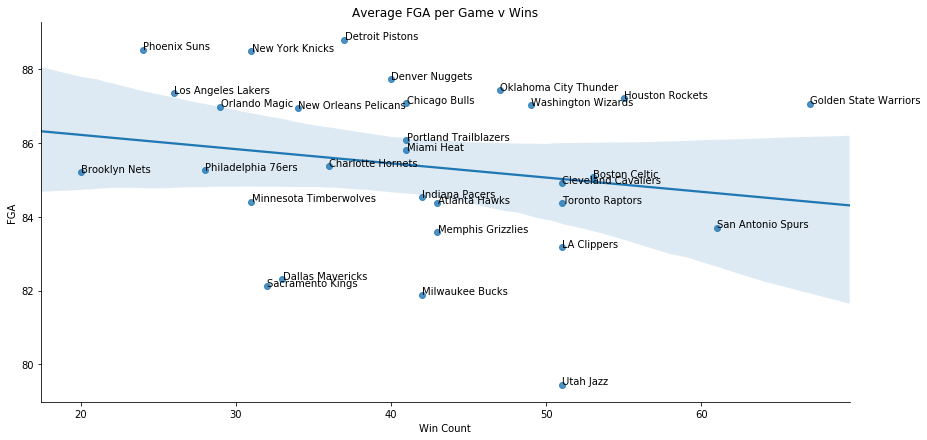

In [13]:
FGA_chart = sns.lmplot('WinCount', # Horizontal axis
           'FGA', # Vertical axis
           data=data_df, # Data source
           fit_reg=True, # Don't fix a regression line
           size = 6,
           aspect =2 ) # size and dimension

plt.title('Average FGA per Game v Wins')
# Set x-axis label
plt.xlabel('Win Count')
# Set y-axis label
plt.ylabel('FGA')


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(data_df.WinCount, data_df.FGA,data_df.Team, plt.gca())

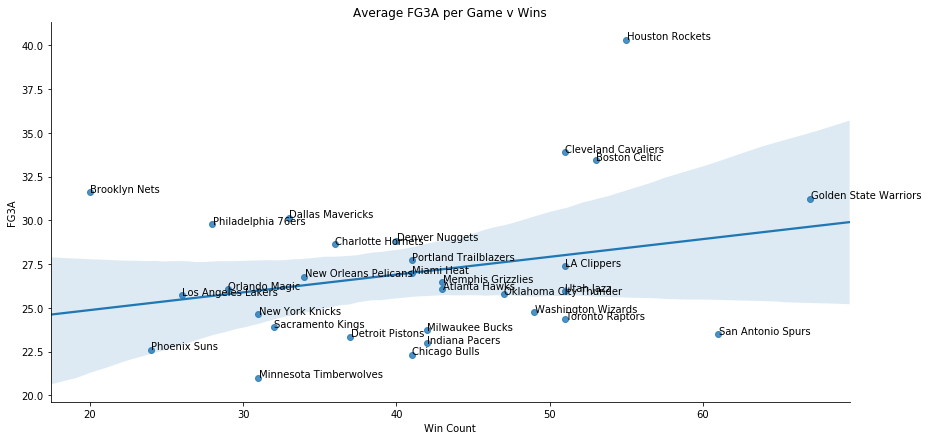

In [14]:
FG3A_chart = sns.lmplot('WinCount', # Horizontal axis
           'FG3A', # Vertical axis
           data=data_df, # Data source
           fit_reg=True, # Don't fix a regression line
           size = 6,
           aspect =2 ) # size and dimension

plt.title('Average FG3A per Game v Wins')
# Set x-axis label
plt.xlabel('Win Count')
# Set y-axis label
plt.ylabel('FG3A')


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(data_df.WinCount, data_df.FG3A,data_df.Team, plt.gca())

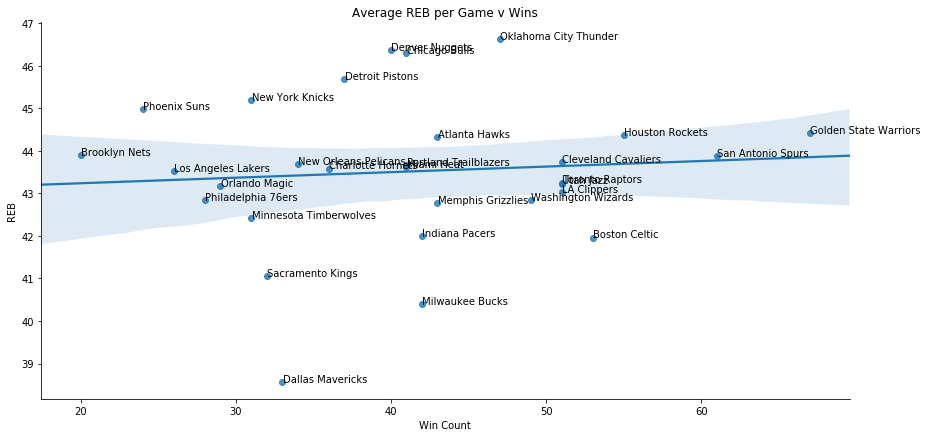

In [15]:
REB_chart = sns.lmplot('WinCount', # Horizontal axis
           'REB', # Vertical axis
           data=data_df, # Data source
           fit_reg=True, # Don't fix a regression line
           size = 6,
           aspect =2 ) # size and dimension

plt.title('Average REB per Game v Wins')
# Set x-axis label
plt.xlabel('Win Count')
# Set y-axis label
plt.ylabel('REB')


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(data_df.WinCount, data_df.REB,data_df.Team, plt.gca())

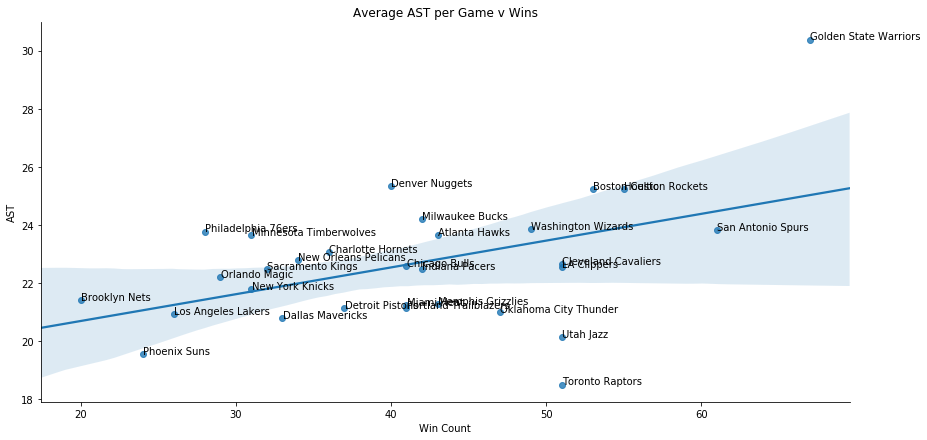

In [16]:
AST_chart = sns.lmplot('WinCount', # Horizontal axis
           'AST', # Vertical axis
           data=data_df, # Data source
           fit_reg=True, # Don't fix a regression line
           size = 6,
           aspect =2 ) # size and dimension

plt.title('Average AST per Game v Wins')
# Set x-axis label
plt.xlabel('Win Count')
# Set y-axis label
plt.ylabel('AST')


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(data_df.WinCount, data_df.AST,data_df.Team, plt.gca())

# Part Two: Anthro Measurement Impact on Free Throw Efficiency

In [17]:
#Count the total number of made and missed free throw shots made.
shots_csv = "Resources/free_throws.csv"
shots_df = pd.read_csv(shots_csv)
free_throw_counts = shots_df["player"].value_counts()
shot_count = pd.DataFrame(free_throw_counts)
shot_count1 = shot_count.reset_index()
shot_count2 = shot_count1.rename(columns = {"index":"Player", "player": "Total Free Throws"})
shot_count2.head()
shots_drop = shots_df[shots_df.shot_made != 0]
shots_drop_count = shots_drop["player"].value_counts()
successful_shots_df =pd.DataFrame(shots_drop_count)
shots_made = successful_shots_df.reset_index()
shots = shots_made.rename(columns = {"index":"Player", "player": "Made Shots"})

In [18]:
final_df = pd.merge(all_players, shot_count2, how = 'left')
final_df1 = final_df.dropna()
final_df1
final_df2 = pd.merge(final_df1, shots, how = 'left')
final_df3 = final_df2.dropna()
final_df3["% Made"] = (final_df3["Made Shots"]/final_df3["Total Free Throws"])*100
final_df3
final_df4 = final_df3[final_df3["Total Free Throws"] > 500]

C:\Users\adler\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


The correlation between both factors is -0.45


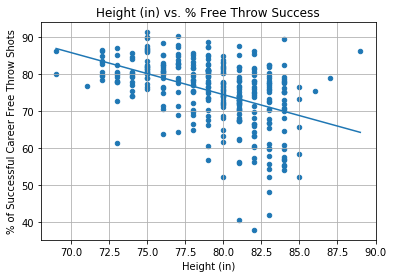

<Figure size 432x288 with 0 Axes>

In [19]:
final_df4.plot(kind = "scatter", x = "player_height", y ="% Made")
correlation = st.pearsonr(final_df4["player_height"], final_df4["% Made"])
plt.xlabel("Height (in)")
plt.ylabel("% of Successful Career Free Throw Shots")
plt.grid()
plt.title("Height (in) vs. % Free Throw Success")
plt.txt= print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(np.unique(final_df4["player_height"]), np.poly1d(np.polyfit(final_df4["player_height"], final_df4["% Made"], 1))(np.unique(final_df4["player_height"])))
plt.show()
plt.savefig("Resources/FreeThrow")

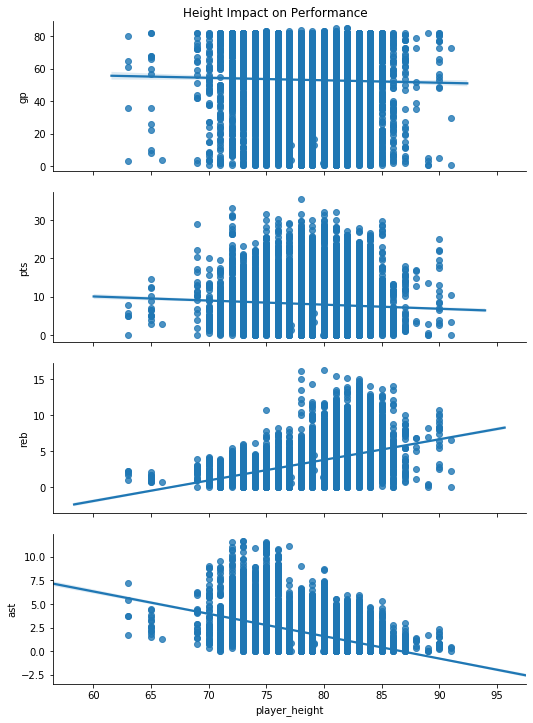

<Figure size 432x288 with 0 Axes>

In [20]:
hc = sns.pairplot(data=players_df, kind='reg', aspect = 3, x_vars=['player_height'], y_vars=['gp','pts','reb','ast'])
hc.fig.suptitle("Height Impact on Performance", y = 1)
plt.show()
plt.savefig("Resources/HeightData")

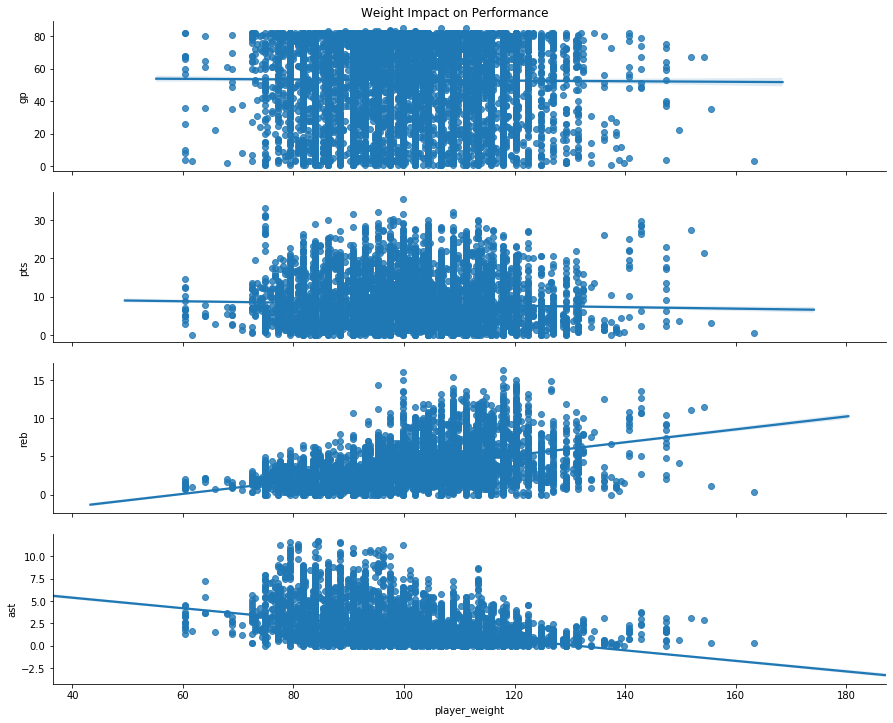

<Figure size 432x288 with 0 Axes>

In [21]:
wc = sns.pairplot(data=players_df, kind='reg', aspect=5, x_vars=['player_weight'], y_vars=['gp','pts','reb','ast'])
wc.fig.suptitle("Weight Impact on Performance", y = 1)
plt.show()
plt.savefig("Resources/WeightData")

# Part Three: Undrafted Free Agents - NCAA Statistical Correlation to NBA Impact

In [22]:
# Filter for players w/ at least 500 minutes played in their first four NBA seasons
ud_11_19_500mins_df = undrafted_since_11_df.loc[undrafted_since_11_df["nba_MP"] > 499]

In [23]:
# Create Correlation Matrix
corr_results_df = ud_11_19_500mins_df.corr(method='pearson').applymap('{:,.2f}'.format)

In [24]:
# Export Correlation Matrix as CSV
corr_results_df.to_csv('Resources/correlations.csv', encoding='utf-8')

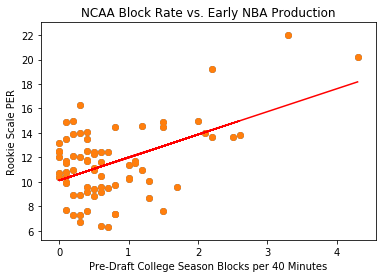

In [25]:
# First plot
x_values = ud_11_19_500mins_df['BLK_40']
y_values = ud_11_19_500mins_df['nba_PER']
plt.scatter(x_values,y_values)
plt.xlabel('Pre-Draft College Season Blocks per 40 Minutes')
plt.ylabel('Rookie Scale PER')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('NCAA Block Rate vs. Early NBA Production')
plt.show()

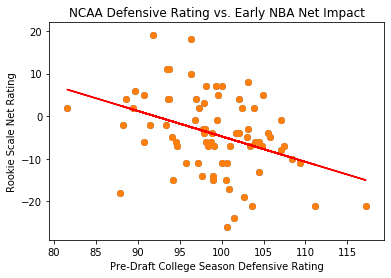

In [26]:
# Second plot
x_values = ud_11_19_500mins_df['DRtg']
y_values = ud_11_19_500mins_df['nba_NetRtg']
plt.scatter(x_values,y_values)
plt.xlabel('Pre-Draft College Season Defensive Rating')
plt.ylabel('Rookie Scale Net Rating')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('NCAA Defensive Rating vs. Early NBA Net Impact')
plt.show()

In [27]:
# Create TJ McConnell NBA First Four Years Statistical Dataframe
TJ_McConnell__career = playercareerstats.PlayerCareerStats(player_id='204456')
TJ_McConnell__career_stats_dfv1 = TJ_McConnell__career.get_data_frames()[0]
TJ_McConnell__career_stats_df2 = TJ_McConnell__career_stats_dfv1.drop([4])
TJ_McConnell__career_stats_df = TJ_McConnell__career_stats_df2.reset_index(drop=True)

In [28]:
# Create Christian Wood NBA First Four Years Statistical Dataframe
Christian_Wood__career = playercareerstats.PlayerCareerStats(player_id='1626174')
Christian_Wood__career_statsv1_df = Christian_Wood__career.get_data_frames()[0]
Christian_Wood__career_statsv1_df
Christian_Wood__career_statsv2_df = Christian_Wood__career_statsv1_df.drop([2, 3])
Christian_Wood__career_stats_df = Christian_Wood__career_statsv2_df.reset_index(drop=True)

In [29]:
#Combine McConnell & Wood Dataframes
tj_cw = TJ_McConnell__career_stats_df.append(Christian_Wood__career_stats_df, ignore_index = True)

In [30]:
#Add Stocks/40 metric
StocksPer40 = ((tj_cw["STL"] + tj_cw["BLK"])/tj_cw["MIN"]*40)
tj_cw["Stocks_40"] = StocksPer40

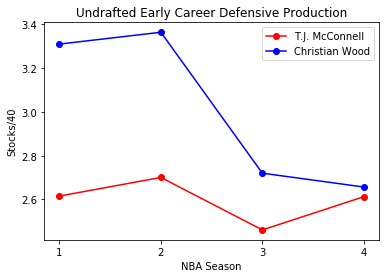

In [31]:
# Third plot
Seasons = (1, 2, 3, 4)
McConnell = (tj_cw.iloc[:4,27])
Wood = tj_cw.iloc[4:8,27]

McConnell_Handle = plt.plot(Seasons, McConnell, marker ='o', color='red', label="T.J. McConnell")
Wood_Handle = plt.plot(Seasons, Wood, marker ='o', color='blue', label="Christian Wood")
plt.xticks(Seasons)
plt.xlabel('NBA Season')
plt.ylabel('Stocks/40')
plt.title('Undrafted Early Career Defensive Production')
plt.legend(loc="upper right")
plt.show()

# Part Four: Offensive Production, Other Box Score Impact, and Shot Charts

# Shot Charts

In [32]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=1, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

#     # Center Court
#     center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
#                            linewidth=lw, color=color)
#     center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
#                            linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -478.5), 500, 400, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

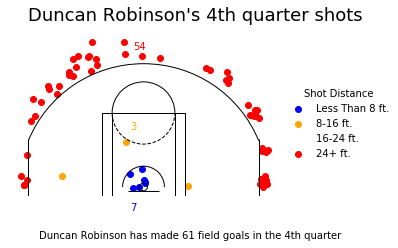

In [33]:
Duncan_Robinson_career_Heat = shotchartdetail.ShotChartDetail(team_id='1610612748',player_id='1629130')
Duncan_Robinson_career_Heat_df = Duncan_Robinson_career_Heat.get_data_frames()[0]
Duncan_Robinson_career_Heat_df.index = Duncan_Robinson_career_Heat_df.index + 1
Duncan_Robinson_career_Heat_df

Duncan_Robinson_career_Heat_df_clutch_time = Duncan_Robinson_career_Heat_df.loc[(Duncan_Robinson_career_Heat_df['PERIOD'] == 4) & 
                                                                (Duncan_Robinson_career_Heat_df['MINUTES_REMAINING'] < 12) &
                                                                (Duncan_Robinson_career_Heat_df['SECONDS_REMAINING'] < 70), :]
Duncan_Robinson_career_Heat_df_clutch_time.head()

Heat_clutch_shots_made = Duncan_Robinson_career_Heat_df_clutch_time.loc[:,'SHOT_ZONE_RANGE'].value_counts()
Heat_clutch_shots_made.to_frame()

# print(Heat_clutch_shots_made.iloc[1])
# print(Heat_clutch_shots_made.iloc[2])
# print(Heat_clutch_shots_made.iloc[2])
# print(Heat_clutch_shots_made.iloc[0])

#Set up colors and labels
Distance = ['Less Than 8 ft.', '8-16 ft.', '16-24 ft.', '24+ ft.']
Colors = ['Blue', 'Orange', 'Green', 'Red']

#Plot the graph
Team_2 = sns.FacetGrid(data=Duncan_Robinson_career_Heat_df_clutch_time, hue='SHOT_ZONE_RANGE', hue_order=Distance, palette =  Colors, aspect=1.61)
Team_2.map(plt.scatter, 'LOC_X', 'LOC_Y').add_legend(title = 'Shot Distance')
draw_court(outer_lines=True)

#Add Text FGM Labels to scatterplot
plt.text(-25,-45, Heat_clutch_shots_made.iloc[1],color = 'blue')
#plt.text(-25,170, Heat_clutch_shots_made.iloc[3],color = 'green')
plt.text(-25,110, Heat_clutch_shots_made.iloc[2],color = 'orange')
plt.text(-20,265, Heat_clutch_shots_made.iloc[0],color = 'red')

#Cleanup graph/ add necessary info
plt.style.use('fivethirtyeight')
plt.axis('off')
plt.text(-220,320,"Duncan Robinson's 4th quarter shots",size = 18)
plt.text(-200,-100,f"Duncan Robinson has made {Heat_clutch_shots_made.iloc[0] + Heat_clutch_shots_made.iloc[1]} field goals in the 4th quarter",size = 10)

plt.savefig('Resources/D_Rob_4th_Qrt_Shot.png',bbox_inches='tight')

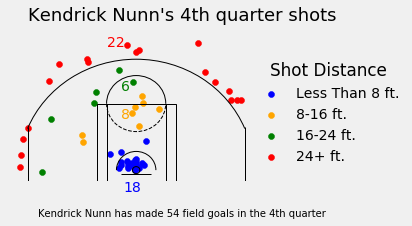

In [34]:
Kendrick_Nunn_career_Heat = shotchartdetail.ShotChartDetail(team_id='1610612748',player_id='1629134')
Kendrick_Nunn_career_Heat_df = Kendrick_Nunn_career_Heat.get_data_frames()[0]
Kendrick_Nunn_career_Heat_df.index = Kendrick_Nunn_career_Heat_df.index + 1
Kendrick_Nunn_career_Heat_df

Kendrick_Nunn_career_Heat_df_clutch_time = Kendrick_Nunn_career_Heat_df.loc[(Kendrick_Nunn_career_Heat_df['PERIOD'] == 4) & 
                                                                (Kendrick_Nunn_career_Heat_df['MINUTES_REMAINING'] < 12) &
                                                                (Kendrick_Nunn_career_Heat_df['SECONDS_REMAINING'] < 70), :]
Kendrick_Nunn_career_Heat_df_clutch_time.head()

Heat_clutch_shots_made = Kendrick_Nunn_career_Heat_df_clutch_time.loc[:,'SHOT_ZONE_RANGE'].value_counts()
Heat_clutch_shots_made.to_frame()

# print(Heat_clutch_shots_made.iloc[1])
# print(Heat_clutch_shots_made.iloc[2])
# print(Heat_clutch_shots_made.iloc[3])
# print(Heat_clutch_shots_made.iloc[0])

#Set up colors and labels
Distance = ['Less Than 8 ft.', '8-16 ft.', '16-24 ft.', '24+ ft.']
Colors = ['Blue', 'Orange', 'Green', 'Red']

#Plot the graph
Team_2 = sns.FacetGrid(data=Kendrick_Nunn_career_Heat_df_clutch_time, hue='SHOT_ZONE_RANGE', hue_order=Distance, palette =  Colors, aspect=1.61)
Team_2.map(plt.scatter, 'LOC_X', 'LOC_Y').add_legend(title = 'Shot Distance')
draw_court(outer_lines=True)

#Add Text FGM Labels to scatterplot
plt.text(-25,-45, Heat_clutch_shots_made.iloc[1],color = 'blue')
plt.text(-30,110, Heat_clutch_shots_made.iloc[2],color = 'orange')
plt.text(-30,170, Heat_clutch_shots_made.iloc[3],color = 'green')
plt.text(-60,265, Heat_clutch_shots_made.iloc[0],color = 'red')

#Cleanup graph/ add necessary info
plt.style.use('fivethirtyeight')
plt.axis('off')
plt.text(-220,320,"Kendrick Nunn's 4th quarter shots",size = 18)
plt.text(-200,-100,f"Kendrick Nunn has made {Heat_clutch_shots_made.iloc[0] + Heat_clutch_shots_made.iloc[1] + Heat_clutch_shots_made.iloc[2] + Heat_clutch_shots_made.iloc[3]} field goals in the 4th quarter ",size = 10)

plt.savefig('Resources/K_Nunn_4th_Qrt_Shot.png',bbox_inches='tight')

# Season Averages

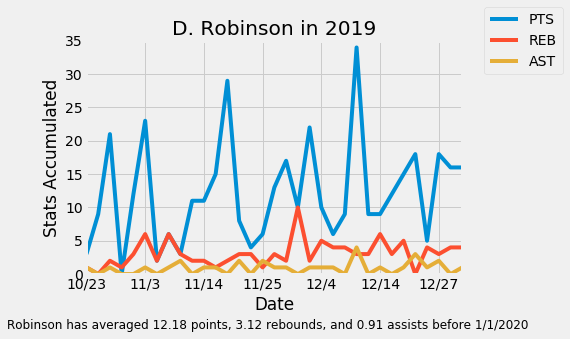

In [35]:
#print the data frame 
gamelog_Robinson = playergamelog.PlayerGameLog(player_id='1629130', season = '2019')
df_Robinson_games_2019 = gamelog_Robinson.get_data_frames()[0]

#set index to have index as correct game numbers
df_Robinson_games_2019 = df_Robinson_games_2019.sort_values(by = 'Game_ID', ascending = True).reset_index(drop=True)
df_Robinson_games_2019.index = df_Robinson_games_2019.index + 1
df_Robinson_games_2019 = df_Robinson_games_2019.sort_values(by = 'Game_ID', ascending = False)
#change game id to integer
df_Robinson_games_2019['Game_ID'] = df_Robinson_games_2019['Game_ID'].astype(int)
df_Robinson_games_2019.tail()

#get data type
df_Robinson_games_2019.dtypes.head()

#Take games before 1/1/2020
gamelog_before_January_Robinson = df_Robinson_games_2019.loc[(df_Robinson_games_2019['Game_ID'] <= 21900504),:]
gamelog_before_January_Robinson = gamelog_before_January_Robinson.iloc[::-1]
#Convert 'GAME_DATE' column to date-time, remove the year, format without leading 0's.
gamelog_before_January_Robinson['GAME_DATE'] = pd.to_datetime(gamelog_before_January_Robinson['GAME_DATE'])
gamelog_before_January_Robinson['month_year'] = gamelog_before_January_Robinson['GAME_DATE'].dt.strftime("%#m/%#d")
gamelog_before_January_Robinson

Robinson_PTS_before_Jan2020 = round(gamelog_before_January_Robinson['PTS'].mean(),2)
Robinson_REB_before_Jan2020 = round(gamelog_before_January_Robinson['REB'].mean(),2)
Robinson_AST_before_Jan2020 = round(gamelog_before_January_Robinson['AST'].mean(),2)

chart7 = gamelog_before_January_Robinson.plot(x = 'month_year', y = ['PTS','REB','AST'])
chart7.set_title("D. Robinson in 2019")
chart7.set_xlabel('Date')
chart7.set_ylabel('Stats Accumulated')
chart7.set_ylim([0,35])

plt.legend(bbox_to_anchor=(1.04,1), loc="center left")
txt= f"Robinson has averaged {Robinson_PTS_before_Jan2020} points, {Robinson_REB_before_Jan2020} rebounds, and {Robinson_AST_before_Jan2020} assists before 1/1/2020"
plt.figtext(0.5, -0.12, txt, wrap=True, horizontalalignment='center', fontsize=12)

plt.savefig('Resources/D_Rob_2019.png',bbox_inches='tight')

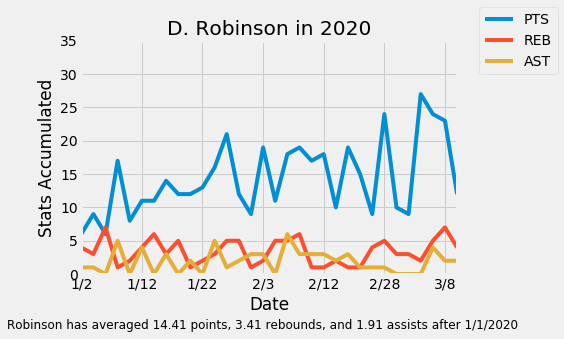

In [36]:
#print the data frame 
gamelog_Robinson = playergamelog.PlayerGameLog(player_id='1629130', season = '2019')
df_Robinson_games_2019 = gamelog_Robinson.get_data_frames()[0]

#set index to have index as correct game numbers
df_Robinson_games_2019 = df_Robinson_games_2019.sort_values(by = 'Game_ID', ascending = True).reset_index(drop=True)
df_Robinson_games_2019.index = df_Robinson_games_2019.index + 1
df_Robinson_games_2019 = df_Robinson_games_2019.sort_values(by = 'Game_ID', ascending = False)
#change game id to integer
df_Robinson_games_2019['Game_ID'] = df_Robinson_games_2019['Game_ID'].astype(int)
df_Robinson_games_2019.tail()

#get data type
df_Robinson_games_2019.dtypes.head()

#Take games after 1/1/2020
gamelog_after_January_Robinson = df_Robinson_games_2019.loc[(df_Robinson_games_2019['Game_ID'] >= 21900504),:]
gamelog_after_January_Robinson = gamelog_after_January_Robinson.iloc[::-1]
#Convert 'GAME_DATE' column to date-time, remove the year, format without leading 0's.
gamelog_after_January_Robinson['GAME_DATE'] = pd.to_datetime(gamelog_after_January_Robinson['GAME_DATE'])
gamelog_after_January_Robinson['month_year'] = gamelog_after_January_Robinson['GAME_DATE'].dt.strftime("%#m/%#d")
gamelog_after_January_Robinson

Robinson_PTS_after_Jan2020 = round(gamelog_after_January_Robinson['PTS'].mean(),2)
Robinson_REB_after_Jan2020 = round(gamelog_after_January_Robinson['REB'].mean(),2)
Robinson_AST_after_Jan2020 = round(gamelog_after_January_Robinson['AST'].mean(),2)

chart8 = gamelog_after_January_Robinson.plot(x = 'month_year', y = ['PTS','REB','AST'])
chart8.set_title("D. Robinson in 2020")
chart8.set_xlabel('Date')
chart8.set_ylabel('Stats Accumulated')
chart8.set_ylim([0,35])
plt.legend(bbox_to_anchor=(1.04,1), loc="center left")
txt= f"Robinson has averaged {Robinson_PTS_after_Jan2020} points, {Robinson_REB_after_Jan2020} rebounds, and {Robinson_AST_after_Jan2020} assists after 1/1/2020"
plt.figtext(0.5, -0.12, txt, wrap=True, horizontalalignment='center', fontsize=12)

plt.savefig('Resources/D_Rob_2020.png',bbox_inches='tight')

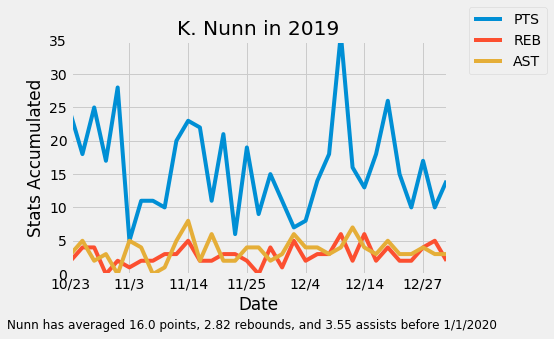

In [37]:
#print the data frame 
gamelog_Nunn = playergamelog.PlayerGameLog(player_id='1629134', season = '2019')
df_Nunn_games_2019 = gamelog_Nunn.get_data_frames()[0]

#set index to have index as correct game numbers
df_Nunn_games_2019 = df_Nunn_games_2019.sort_values(by = 'Game_ID', ascending = True).reset_index(drop=True)
df_Nunn_games_2019.index = df_Nunn_games_2019.index + 1
df_Nunn_games_2019 = df_Nunn_games_2019.sort_values(by = 'Game_ID', ascending = False)
#change game id to integer
df_Nunn_games_2019['Game_ID'] = df_Nunn_games_2019['Game_ID'].astype(int)
df_Nunn_games_2019.tail()

#get data type
df_Nunn_games_2019.dtypes.head()

#Take games before 1/1/2020
gamelog_before_January_Nunn = df_Nunn_games_2019.loc[(df_Nunn_games_2019['Game_ID'] <= 21900504),:]
gamelog_before_January_Nunn = gamelog_before_January_Nunn.iloc[::-1]
#Convert 'GAME_DATE' column to date-time, remove the year, format without leading 0's.
gamelog_before_January_Nunn['GAME_DATE'] = pd.to_datetime(gamelog_before_January_Nunn['GAME_DATE'])
gamelog_before_January_Nunn['month_year'] = gamelog_before_January_Nunn['GAME_DATE'].dt.strftime("%#m/%#d")
gamelog_before_January_Nunn

Nunn_PTS_before_Jan2020 = round(gamelog_before_January_Nunn['PTS'].mean(),2)
Nunn_REB_before_Jan2020 = round(gamelog_before_January_Nunn['REB'].mean(),2)
Nunn_AST_before_Jan2020 = round(gamelog_before_January_Nunn['AST'].mean(),2)

chart5 = gamelog_before_January_Nunn.plot(x = 'month_year', y = ['PTS','REB','AST'])
chart5.set_title("K. Nunn in 2019")
chart5.set_xlabel('Date')
chart5.set_ylabel('Stats Accumulated')
chart5.set_ylim([0,35])
plt.legend(bbox_to_anchor=(1.04,1), loc="center left")
txt= f"Nunn has averaged {Nunn_PTS_before_Jan2020} points, {Nunn_REB_before_Jan2020} rebounds, and {Nunn_AST_before_Jan2020} assists before 1/1/2020"
plt.figtext(0.5, -0.12, txt, wrap=True, horizontalalignment='center', fontsize=12)

plt.savefig('Resources/K_Nunn_2019.png',bbox_inches='tight')

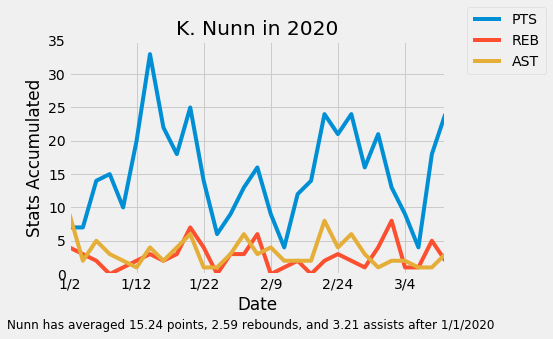

In [38]:
#print the data frame 
gamelog_Nunn = playergamelog.PlayerGameLog(player_id='1629134', season = '2019')
df_Nunn_games_2019 = gamelog_Nunn.get_data_frames()[0]

#set index to have index as correct game numbers
df_Nunn_games_2019 = df_Nunn_games_2019.sort_values(by = 'Game_ID', ascending = True).reset_index(drop=True)
df_Nunn_games_2019.index = df_Nunn_games_2019.index + 1
df_Nunn_games_2019 = df_Nunn_games_2019.sort_values(by = 'Game_ID', ascending = False)
#change game id to integer
df_Nunn_games_2019['Game_ID'] = df_Nunn_games_2019['Game_ID'].astype(int)
df_Nunn_games_2019.tail()

#get data type
df_Nunn_games_2019.dtypes.head()

#Take games after 1/1/2020
gamelog_after_January_Nunn = df_Nunn_games_2019.loc[(df_Nunn_games_2019['Game_ID'] >= 21900504),:]
gamelog_after_January_Nunn = gamelog_after_January_Nunn.iloc[::-1]
#Convert 'GAME_DATE' column to date-time, remove the year, format without leading 0's.
gamelog_after_January_Nunn['GAME_DATE'] = pd.to_datetime(gamelog_after_January_Nunn['GAME_DATE'])
gamelog_after_January_Nunn['month_year'] = gamelog_after_January_Nunn['GAME_DATE'].dt.strftime("%#m/%#d")
gamelog_after_January_Nunn

Nunn_PTS_after_Jan2020 = round(gamelog_after_January_Nunn['PTS'].mean(),2)
Nunn_REB_after_Jan2020 = round(gamelog_after_January_Nunn['REB'].mean(),2)
Nunn_AST_after_Jan2020 = round(gamelog_after_January_Nunn['AST'].mean(),2)

chart6 = gamelog_after_January_Nunn.plot(x = 'month_year', y = ['PTS','REB','AST'])
chart6.set_title("K. Nunn in 2020")
chart6.set_xlabel('Date')
chart6.set_ylabel('Stats Accumulated')
chart6.set_ylim([0,35])
plt.legend(bbox_to_anchor=(1.04,1), loc="center left")
txt= f"Nunn has averaged {Nunn_PTS_after_Jan2020} points, {Nunn_REB_after_Jan2020} rebounds, and {Nunn_AST_after_Jan2020} assists after 1/1/2020"
plt.figtext(0.5, -0.12, txt, wrap=True, horizontalalignment='center', fontsize=12)

plt.savefig('Resources/K_Nunn_2020.png',bbox_inches='tight')

# Season Averages by Month

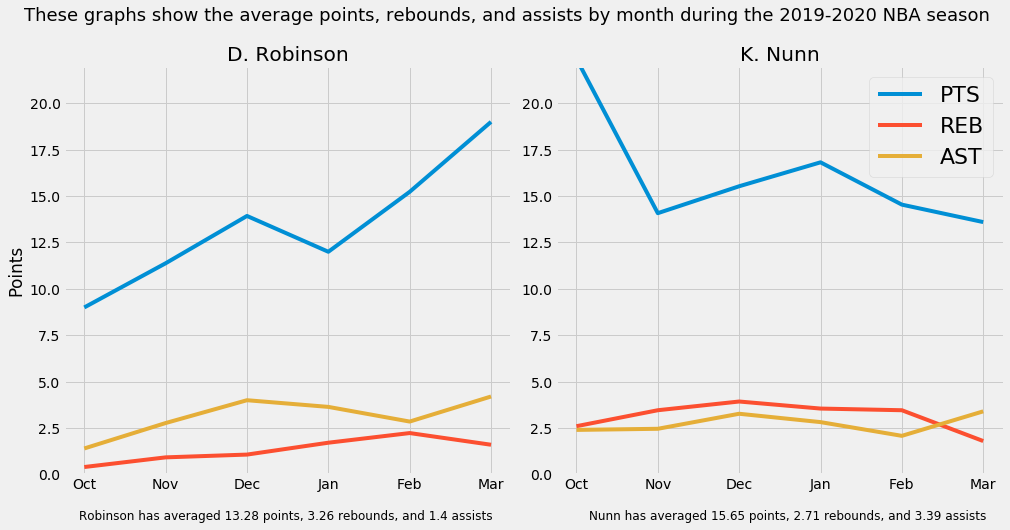

In [39]:
# print the data frame 
gamelog_Robinson = playergamelog.PlayerGameLog(player_id='1629130', season = '2019')
df_Robinson_games = gamelog_Robinson.get_data_frames()[0]
df_Robinson_games

df_Robinson_games = df_Robinson_games.sort_values(by = 'Game_ID', ascending = True).reset_index(drop=True)
df_Robinson_games.index = df_Robinson_games.index + 1
df_Robinson_games = df_Robinson_games.sort_values(by = 'Game_ID', ascending = False)
df_Robinson_games = df_Robinson_games.iloc[::-1]
df_Robinson_games

df_Robinson_games.dtypes

df_Robinson_games['GAME_DATE'] = pd.to_datetime(df_Robinson_games['GAME_DATE'])
df_Robinson_games['year'], df_Robinson_games['month'] = df_Robinson_games['GAME_DATE'].dt.year, df_Robinson_games['GAME_DATE'].dt.month
df_Robinson_games

Robinson_PTS_in_Jan = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 1), 'PTS'].mean(),2)
Robinson_REB_in_Jan = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 1), 'REB'].mean(),2)
Robinson_AST_in_Jan = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 1), 'AST'].mean(),2)
Robinson_PTS_in_Feb = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 2), 'PTS'].mean(),2)
Robinson_REB_in_Feb = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 2), 'REB'].mean(),2)
Robinson_AST_in_Feb = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 2), 'AST'].mean(),2)
Robinson_PTS_in_Mar = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 3), 'PTS'].mean(),2)
Robinson_REB_in_Mar = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 3), 'REB'].mean(),2)
Robinson_AST_in_Mar = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 3), 'AST'].mean(),2)
Robinson_PTS_in_Apr = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 4), 'PTS'].mean(),2)
Robinson_REB_in_Apr = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 4), 'REB'].mean(),2)
Robinson_AST_in_Apr = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 4), 'AST'].mean(),2)
Robinson_PTS_in_May = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 5), 'PTS'].mean(),2)
Robinson_REB_in_May = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 5), 'REB'].mean(),2)
Robinson_AST_in_May = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 5), 'AST'].mean(),2)
Robinson_PTS_in_Jun = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 6), 'PTS'].mean(),2)
Robinson_REB_in_Jun = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 6), 'REB'].mean(),2)
Robinson_AST_in_Jun = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 6), 'AST'].mean(),2)
Robinson_PTS_in_Jul = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 7), 'PTS'].mean(),2)
Robinson_REB_in_Jul = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 7), 'REB'].mean(),2)
Robinson_AST_in_Jul = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 7), 'AST'].mean(),2)
Robinson_PTS_in_Aug = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 8), 'PTS'].mean(),2)
Robinson_REB_in_Aug = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 8), 'REB'].mean(),2)
Robinson_AST_in_Aug = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 8), 'AST'].mean(),2)
Robinson_PTS_in_Sep = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 9), 'PTS'].mean(),2)
Robinson_REB_in_Sep = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 9), 'REB'].mean(),2)
Robinson_AST_in_Sep = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 9), 'AST'].mean(),2)
Robinson_PTS_in_Oct = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 10), 'PTS'].mean(),2)
Robinson_REB_in_Oct = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 10), 'REB'].mean(),2)
Robinson_AST_in_Oct = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 10), 'AST'].mean(),2)
Robinson_PTS_in_Nov = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 11), 'PTS'].mean(),2)
Robinson_REB_in_Nov = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 11), 'REB'].mean(),2)
Robinson_AST_in_Nov = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 11), 'AST'].mean(),2)
Robinson_PTS_in_Dec = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 12), 'PTS'].mean(),2)
Robinson_REB_in_Dec = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 12), 'REB'].mean(),2)
Robinson_AST_in_Dec = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 12), 'AST'].mean(),2)

df1= pd.DataFrame({'Oct':[Robinson_PTS_in_Oct, Robinson_REB_in_Oct, Robinson_AST_in_Oct],
                   'Nov':[Robinson_PTS_in_Nov, Robinson_REB_in_Nov, Robinson_AST_in_Nov],
                   'Dec':[Robinson_PTS_in_Dec, Robinson_REB_in_Dec, Robinson_AST_in_Dec],
                   'Jan':[Robinson_PTS_in_Jan, Robinson_REB_in_Jan, Robinson_AST_in_Jan],
                   'Feb':[Robinson_PTS_in_Feb, Robinson_REB_in_Feb, Robinson_AST_in_Feb],
                   'Mar':[Robinson_PTS_in_Mar, Robinson_REB_in_Mar, Robinson_AST_in_Mar],
                   'Apr':[Robinson_PTS_in_Apr, Robinson_REB_in_Apr, Robinson_AST_in_Apr],
                   'May':[Robinson_PTS_in_May, Robinson_REB_in_May, Robinson_AST_in_May],
                   'Jun':[Robinson_PTS_in_Jun, Robinson_REB_in_Jun, Robinson_AST_in_Jun],
                   'Jul':[Robinson_PTS_in_Jul, Robinson_REB_in_Jul, Robinson_AST_in_Jul],
                   'Aug':[Robinson_PTS_in_Aug, Robinson_REB_in_Aug, Robinson_AST_in_Aug],
                   'Sep':[Robinson_PTS_in_Sep, Robinson_REB_in_Sep, Robinson_AST_in_Sep]
                   })

df1= df1.transpose()

df1= df1.rename(columns={0: 'PTS', 1: 'REB', 2: 'AST'})

df1= df1.dropna()

df1= df1.reset_index()

#print(df1)

## max(df, key=df.get)

# ax1 = df1.plot(x='index', y='PTS',legend=None )

# ax1.set_title("D. Robinson points by month")
# ax1.set_xlabel('Month')
# ax1.set_ylabel('Points')

#plt.show()



# print the data frame 
gamelog_Nunn = playergamelog.PlayerGameLog(player_id='1629134', season = '2019')
df_Nunn_games = gamelog_Nunn.get_data_frames()[0]
df_Nunn_games

df_Nunn_games = df_Nunn_games.sort_values(by = 'Game_ID', ascending = True).reset_index(drop=True)
df_Nunn_games.index = df_Nunn_games.index + 1
df_Nunn_games = df_Nunn_games.sort_values(by = 'Game_ID', ascending = False)
df_Nunn_games = df_Nunn_games.iloc[::-1]
df_Nunn_games

df_Nunn_games.dtypes

df_Nunn_games['GAME_DATE'] = pd.to_datetime(df_Nunn_games['GAME_DATE'])
df_Nunn_games['year'], df_Nunn_games['month'] = df_Nunn_games['GAME_DATE'].dt.year, df_Nunn_games['GAME_DATE'].dt.month
df_Nunn_games

Nunn_PTS_in_Jan = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 1), 'PTS'].mean(),2)
Nunn_REB_in_Jan = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 1), 'REB'].mean(),2)
Nunn_AST_in_Jan = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 1), 'AST'].mean(),2)
Nunn_PTS_in_Feb = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 2), 'PTS'].mean(),2)
Nunn_REB_in_Feb = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 2), 'REB'].mean(),2)
Nunn_AST_in_Feb = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 2), 'AST'].mean(),2)
Nunn_PTS_in_Mar = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 3), 'PTS'].mean(),2)
Nunn_REB_in_Mar = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 3), 'REB'].mean(),2)
Nunn_AST_in_Mar = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 3), 'AST'].mean(),2)
Nunn_PTS_in_Apr = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 4), 'PTS'].mean(),2)
Nunn_REB_in_Apr = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 4), 'REB'].mean(),2)
Nunn_AST_in_Apr = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 4), 'AST'].mean(),2)
Nunn_PTS_in_May = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 5), 'PTS'].mean(),2)
Nunn_REB_in_May = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 5), 'REB'].mean(),2)
Nunn_AST_in_May = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 5), 'AST'].mean(),2)
Nunn_PTS_in_Jun = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 6), 'PTS'].mean(),2)
Nunn_REB_in_Jun = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 6), 'REB'].mean(),2)
Nunn_AST_in_Jun = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 6), 'AST'].mean(),2)
Nunn_PTS_in_Jul = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 7), 'PTS'].mean(),2)
Nunn_REB_in_Jul = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 7), 'REB'].mean(),2)
Nunn_AST_in_Jul = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 7), 'AST'].mean(),2)
Nunn_PTS_in_Aug = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 8), 'PTS'].mean(),2)
Nunn_REB_in_Aug = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 8), 'REB'].mean(),2)
Nunn_AST_in_Aug = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 8), 'AST'].mean(),2)
Nunn_PTS_in_Sep = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 9), 'PTS'].mean(),2)
Nunn_REB_in_Sep = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 9), 'REB'].mean(),2)
Nunn_AST_in_Sep = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 9), 'AST'].mean(),2)
Nunn_PTS_in_Oct = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 10), 'PTS'].mean(),2)
Nunn_REB_in_Oct = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 10), 'REB'].mean(),2)
Nunn_AST_in_Oct = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 10), 'AST'].mean(),2)
Nunn_PTS_in_Nov = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 11), 'PTS'].mean(),2)
Nunn_REB_in_Nov = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 11), 'REB'].mean(),2)
Nunn_AST_in_Nov = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 11), 'AST'].mean(),2)
Nunn_PTS_in_Dec = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 12), 'PTS'].mean(),2)
Nunn_REB_in_Dec = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 12), 'REB'].mean(),2)
Nunn_AST_in_Dec = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 12), 'AST'].mean(),2)

df2= pd.DataFrame({'Oct':[Nunn_PTS_in_Oct, Nunn_REB_in_Oct, Nunn_AST_in_Oct],
                   'Nov':[Nunn_PTS_in_Nov, Nunn_REB_in_Nov, Nunn_AST_in_Nov],
                   'Dec':[Nunn_PTS_in_Dec, Nunn_REB_in_Dec, Nunn_AST_in_Dec],
                   'Jan':[Nunn_PTS_in_Jan, Nunn_REB_in_Jan, Nunn_AST_in_Jan],
                   'Feb':[Nunn_PTS_in_Feb, Nunn_REB_in_Feb, Nunn_AST_in_Feb],
                   'Mar':[Nunn_PTS_in_Mar, Nunn_REB_in_Mar, Nunn_AST_in_Mar],
                   'Apr':[Nunn_PTS_in_Apr, Nunn_REB_in_Apr, Nunn_AST_in_Apr],
                   'May':[Nunn_PTS_in_May, Nunn_REB_in_May, Nunn_AST_in_May],
                   'Jun':[Nunn_PTS_in_Jun, Nunn_REB_in_Jun, Nunn_AST_in_Jun],
                   'Jul':[Nunn_PTS_in_Jul, Nunn_REB_in_Jul, Nunn_AST_in_Jul],
                   'Aug':[Nunn_PTS_in_Aug, Nunn_REB_in_Aug, Nunn_AST_in_Aug],
                   'Sep':[Nunn_PTS_in_Sep, Nunn_REB_in_Sep, Nunn_AST_in_Sep]
                   })



df2= df2.transpose()

df2= df2.rename(columns={0: 'PTS', 1: 'REB', 2: 'AST'})

df2= df2.dropna()

df2= df2.reset_index()

#print(df2)

## max(df, key=df.get)

# ax2 = df2.plot(x='index', y='PTS',legend=None )

# ax2.set_title("K. Nunn points by month")
# ax2.set_xlabel('Month')
# ax2.set_ylabel('Points')

#plt.show()

fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,7)
fig.subplots_adjust(wspace = .1)
fig.subplots_adjust(hspace = .3)

L1, = ax1.plot(df1['index'], df1['PTS'])
L2, = ax1.plot(df1['index'], df1['AST'])
L3, = ax1.plot(df1['index'], df1['REB'])
ax1.set_ylim([0,22])
ax1.set_title("D. Robinson")
ax1.set_ylabel("Points")

gamelog_Robinson = playergamelog.PlayerGameLog(player_id='1629130', season = '2019')
df_Robinson_games_2019 = gamelog_Robinson.get_data_frames()[0]

df_Robinson_PTS_2019 = round(df_Robinson_games_2019['PTS'].mean(),2)
df_Robinson_REB_2019 = round(df_Robinson_games_2019['REB'].mean(),2)
df_Robinson_AST_2019 = round(df_Robinson_games_2019['AST'].mean(),2)
txt1= f"Robinson has averaged {df_Robinson_PTS_2019} points, {df_Robinson_REB_2019} rebounds, and {df_Robinson_AST_2019} assists"
plt.figtext(0.285, -0.02, txt1, wrap=True, horizontalalignment='center', fontsize=12)


L1, = ax2.plot(df2['index'], df2['PTS'])
L2, = ax2.plot(df2['index'], df2['AST'])
L3, = ax2.plot(df2['index'], df2['REB'])
ax2.set_ylim([0,22])
ax2.set_title("K. Nunn")

gamelog_Nunn = playergamelog.PlayerGameLog(player_id='1629134', season = '2019')
df_Nunn_games_2019 = gamelog_Nunn.get_data_frames()[0]

df_Nunn_PTS_2019 = round(df_Nunn_games_2019['PTS'].mean(),2)
df_Nunn_REB_2019 = round(df_Nunn_games_2019['REB'].mean(),2)
df_Nunn_AST_2019 = round(df_Nunn_games_2019['AST'].mean(),2)
txt2= f"Nunn has averaged {df_Nunn_PTS_2019} points, {df_Nunn_REB_2019} rebounds, and {df_Nunn_AST_2019} assists"
plt.figtext(0.75, -0.02, txt2, wrap=True, horizontalalignment='center', fontsize=12)

plt.legend([L1, L2, L3],["PTS", "REB", "AST"],loc= 'upper right',prop={'size': 22})

txt3= f"These graphs show the average points, rebounds, and assists by month during the 2019-2020 NBA season"
plt.figtext(0.49, .97, txt3, wrap=True, horizontalalignment='center', fontsize=18)

plt.savefig('Resources/D_Rob_and_K_Nunn_season_averages.png',bbox_inches='tight')